In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Settings

In [2]:
duration_seconds = 10
sampling_rate = 100 # Hz
heart_rate_bpm = 72
rr_interval = 60 / heart_rate_bpm # in seconds
num_samples = duration_seconds * sampling_rate
time = np.linspace(0, duration_seconds, num_samples)

Simulate hearbeat spikes

In [3]:
signal = np.zeros_like(time)
beat_times = 0
current_time = 0
while current_time < duration_seconds:
    jitter = np.random.normal(loc=0, scale=0.05) # adds timing noise
    beat_time = current_time + rr_interval +jitter
    if beat_time < duration_seconds:
        beat_index = int(beat_time * sampling_rate)
        signal[beat_index] = 1.0 # spike
        current_time = beat_time
    else:
        break

Save to CSV

In [4]:
df = pd.DataFrame({"Time (s)": time, "Signal": signal})
df.to_csv("simulated_heart_signal.csv", index=False)

Plot

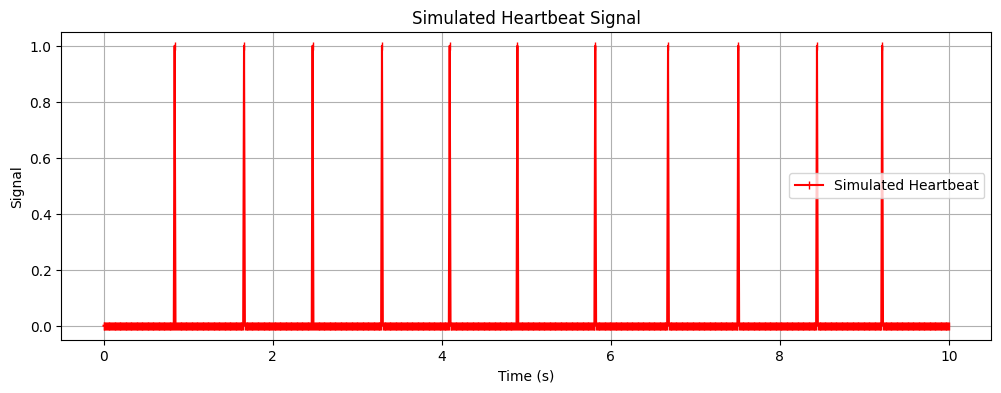

In [5]:
plt.figure(figsize=(12, 4))
plt.plot(time, signal, label="Simulated Heartbeat", color='red', marker='|', linestyle='-')
plt.title("Simulated Heartbeat Signal")
plt.xlabel("Time (s)")
plt.ylabel("Signal")
plt.grid(True)
plt.legend()
plt.show()